In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [75]:
# load the image
from matplotlib.image import imread
image = imread('um.png')[:,:,0]

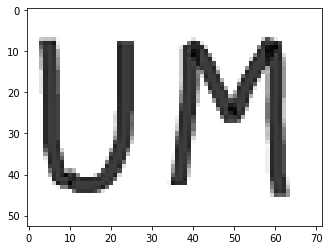

In [76]:
plt.imshow(image,cmap='gray')

In [ ]:
from skimage import data
coins = data.coins()
coins.shape

In [ ]:
plt.imshow(coins[0:90,0:185],cmap='gray')
coins = coins[0:90,0:185]

In [ ]:
from skimage.transform import resize

In [ ]:
s = 5
image = resize(image, (image.shape[0]//s, image.shape[1]//s))

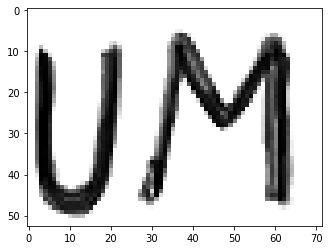

In [28]:
plt.imshow(image,cmap='gray')

In [6]:
image.shape

(51, 70)

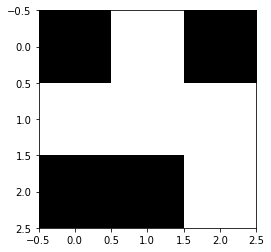

In [7]:
image = np.array([[1,0,1],[0,0,0],[1,1,0]])
plt.imshow(image,cmap='binary')

In [46]:
hight, width = image.shape
hight,width

(53, 72)

In [47]:
X = image.reshape(-1,1)
X.shape[0]

3816

In [48]:
X[2,0],image[0,2]

(1.0, 1.0)

In [49]:
m =hight*width
m

3816

In [63]:
# distances
D = pairwise_distances(X)
D.shape

(3816, 3816)

In [ ]:
D

In [51]:
def pixel_to_row(i,j):
    return i*width+j

In [ ]:
i,j=2,2
pixel_to_row(i,j)

In [ ]:
pixel_to_row(0,1)

In [ ]:
D.shape

In [64]:
w = np.zeros(D.shape)
#dist = np.zeros(D.shape)
for i in range(hight):
    for j in range(width):
        # (i,j+1)
        if j<width-1:
            w[pixel_to_row(i,j),pixel_to_row(i,j+1)] =  1
        # (i,j-1)
        if j>0:
            w[pixel_to_row(i,j),pixel_to_row(i,j-1)] =  1
        # (i+1,j)
        if i<hight-1:
            w[pixel_to_row(i,j),pixel_to_row(i+1,j)] =  1
        # (i-1,j)
        if i>0:
            w[pixel_to_row(i,j),pixel_to_row(i-1,j)] =  1

In [65]:
w==0

array([[ True, False,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ...,  True, False,  True]])

In [67]:
dist = D.copy()
dist[w==0]=np.inf
dist

array([[inf,  0., inf, ..., inf, inf, inf],
       [ 0., inf,  0., ..., inf, inf, inf],
       [inf,  0., inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf,  0., inf],
       [inf, inf, inf, ...,  0., inf,  0.],
       [inf, inf, inf, ..., inf,  0., inf]], dtype=float32)

In [68]:
n_clusters=10

In [56]:
# Make each point its own cluster of one
k = m 
clusters = np.arange(k)

In [ ]:
clusters

In [ ]:
c = 4
Xc = np.zeros(X.shape)
Xc[clusters==c]=1
plt.imshow(Xc.reshape(image.shape))

In [ ]:
# find closest clusters
i, j = np.unravel_index(np.argmin(dist),(k,k))
i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
i,j

In [ ]:
 # merge clusters
clusters[clusters==j]=i

# rename clusters
clusters[clusters>j] -= 1

# recompute distance from the new cluster i to the remaining clusters'
dist[i] = np.minimum(dist[i],dist[j]) # 
dist[:,i] = dist[i] # distance_clusters matrix is symmetric
dist[i,i]= np.inf # set the distance from cluster i to itself to infinity

# remove row j and column j from distance_clusters matrix
dist = np.delete(dist,j,0) # remove row j
dist = np.delete(dist,j,1) # remove column j


# reduce number of clusters
k = k-1


In [69]:
# Make each point its own cluster of one
k = m 
clusters = np.arange(k)

# hierarchical clustering iteration'
while k>n_clusters:  
    if k % 100 ==0:
        print(k)
    # find closest clusters
    i, j = np.unravel_index(np.argmin(dist),(k,k))
    i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i

    # merge clusters
    clusters[clusters==j]=i

    # rename clusters
    clusters[clusters>j] -= 1

    # recompute distance from the new cluster i to the remaining clusters'
    dist[i] = np.minimum(dist[i],dist[j]) # 
    dist[:,i] = dist[i] # distance_clusters matrix is symmetric
    dist[i,i]= np.inf # set the distance from cluster i to itself to infinity

    # remove row j and column j from distance_clusters matrix
    dist = np.delete(dist,j,0) # remove row j
    dist = np.delete(dist,j,1) # remove column j


    # reduce number of clusters
    k = k-1


3800
3700
3600
3500
3400
3300
3200
3100
3000
2900
2800
2700
2600
2500
2400
2300
2200
2100
2000
1900
1800
1700
1600
1500
1400
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


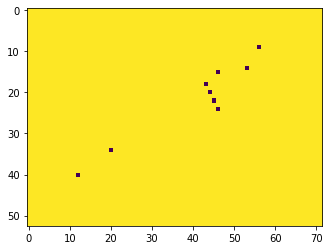

In [70]:
i=0
X_seg = np.zeros(X.shape)
X_seg[clusters==i,0]=1
plt.imshow(X_seg.reshape(hight,width))

In [ ]:
clusters

## k-means

In [77]:
image.shape

(53, 72)

In [79]:
Xcolor = image.reshape(-1,1)
Xcolor.shape

(3816, 1)

In [80]:
dist_color = pairwise_distances(Xcolor)

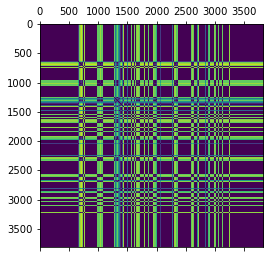

In [84]:
plt.matshow(dist_color)

In [94]:
M1,M2 = np.indices(image.shape)
Xpos = np.c_[(M1.reshape(-1,1),M2.reshape(-1,1))]

In [95]:
Xpos.shape

(3816, 2)

In [125]:
sigma = 5
dist_pos = pairwise_distances(Xpos)

In [129]:
dist_pos[0,6]

6.0

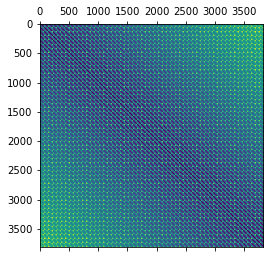

In [130]:
plt.matshow(dist_pos)

In [131]:
dist=dist_color+dist_pos

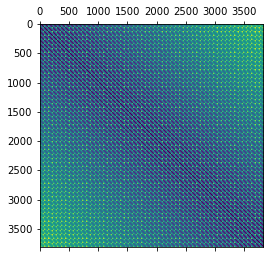

In [132]:
plt.matshow(dist)

In [133]:
n_clusters=3

In [134]:
k = m 
clusters = np.arange(k)

# hierarchical clustering iteration'
while k>n_clusters:  
    if k % 100 ==0:
        print(k)
    # find closest clusters
    i, j = np.unravel_index(np.argmin(dist),(k,k))
    i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i

    # merge clusters
    clusters[clusters==j]=i

    # rename clusters
    clusters[clusters>j] -= 1

    # recompute distance from the new cluster i to the remaining clusters'
    dist[i] = np.minimum(dist[i],dist[j]) # 
    dist[:,i] = dist[i] # distance_clusters matrix is symmetric
    dist[i,i]= np.inf # set the distance from cluster i to itself to infinity

    # remove row j and column j from distance_clusters matrix
    dist = np.delete(dist,j,0) # remove row j
    dist = np.delete(dist,j,1) # remove column j


    # reduce number of clusters
    k = k-1


3800
3700
3600
3500
3400
3300
3200
3100
3000
2900
2800
2700
2600
2500
2400
2300
2200
2100
2000
1900
1800
1700
1600
1500
1400
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


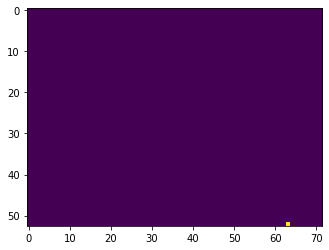

In [123]:
i=1
X_seg = np.zeros(Xcolor.shape)
X_seg[clusters==i,0]=1
plt.imshow(X_seg.reshape(image.shape))

In [124]:
clusters

array([0, 0, 0, ..., 7, 8, 9])